In this project we will explore the MNIST data set.  The data set is included as part of the keras.datasets tensorflow module.

<strong> <center>Recognizing Handwritten Digits Using the MNIST Data Set</center> </strong>

The first line below downloads the keras MNIST dataset which contains images from thousands of hand written digits (0-9).  We will explore the data using matplotlib.

In [1]:
# Download the mnist dataset fron tesorflow.kera.datasets
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot
import numpy as np

In [2]:
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [3]:
# load dataset
(xx_train, yy_train), (xx_test, yy_test) = load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (xx_train.shape, yy_train.shape))
print('Test: X=%s, y=%s' % (xx_test.shape, yy_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


We can see that there are 60,000 images in the training data set and 10,000 images in the test image data set.  Each image shape is 28x28.

<strong> <u>Plot the images:</u></strong>
We will setup a quick routine to plot each image using the pyplot.imshow function. By changing the istart number in the code below, we can view the 25 hand-written images starting with the image number entered in  "istart"

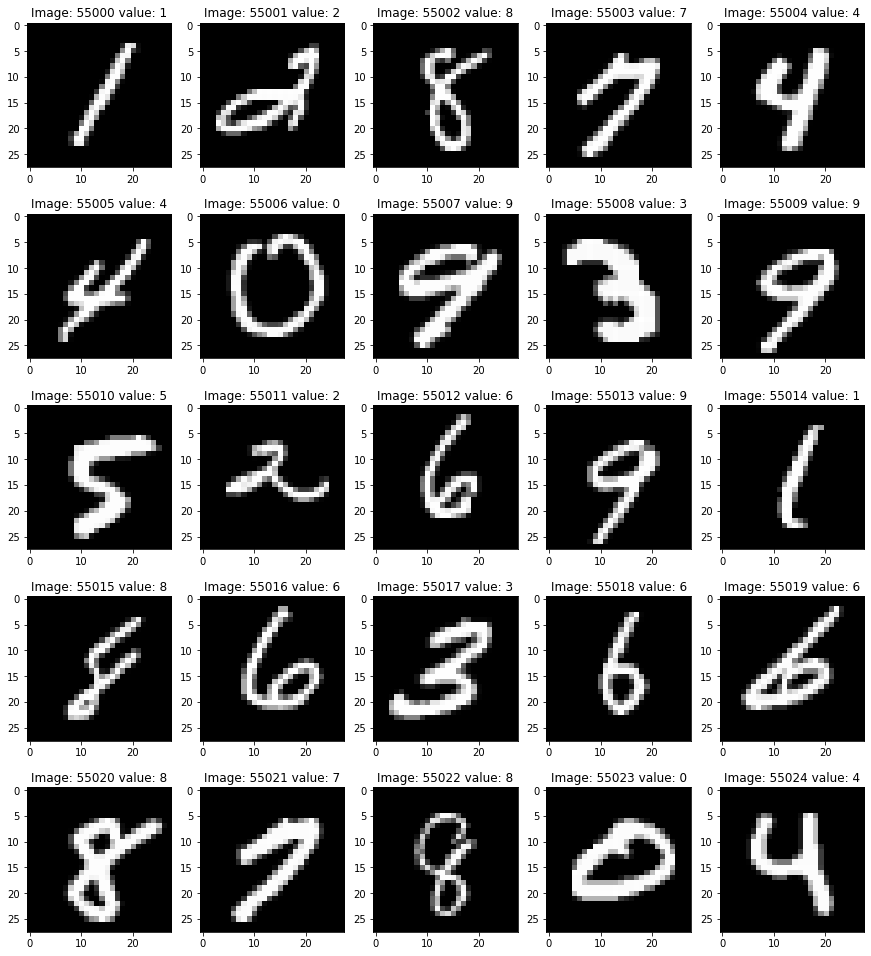

In [4]:
# plot first few images
istart = 55000
pyplot.figure(figsize=(15,17))
for i in range(25):
    # define subplot
    title = "Image: " + str(istart+i) + " value: " + str(yy_train[istart+i])
    pyplot.subplot(5, 5, i+1, title=title)
    # plot raw pixel data
    pyplot.imshow(xx_train[istart+i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

Let's look at one of the images and look at the structure of the rows of data.  Let's choose image 55011, from the image above we can see it's the number two and around row 15 we'll see a slice through the loop and tail of the number"2":

In [5]:
xx_train[55011,15,:]

array([  0,   0,   0,   0,   0, 121, 251, 254, 235, 243, 248, 143,  14,
         4, 152, 253, 175,  18,   0,   0,   0,   0,   2, 113, 243,   0,
         0,   0], dtype=uint8)

We can see from the output above that the data is not normalized.  Typically we want the data to be normailzed between the range [0, 1] or [-1, +1].  We can check for the max value of any given image.  For example, for the 50,555th image the max value in the 28x28 image is:

In [6]:
np.max(xx_train[50555,:])

255

Given that these are gray-scale images, it's expected that most will have a 0-255 value range.  We will scale these to the [0, 1] range but first let's make sure we understand the structure of the data.  Let's look at the shape of second image (keep in mind that index #1 is the second image):

In [7]:
# determine the shape of the input images
i_shape = xx_train.shape[1:]
# determine the number of classes
n_classes = len(unique(yy_train))
print(i_shape, n_classes)

(28, 28) 10


In [8]:
# reshape data to have a single channel
x_train = xx_train.reshape((xx_train.shape[0], xx_train.shape[1], xx_train.shape[2], 1))
x_test = xx_test.reshape((xx_test.shape[0], xx_test.shape[1], xx_test.shape[2], 1))

In [9]:
in_shape = x_train.shape[1:]
print(in_shape)
#To see the actual data for the first image we can simply print it. 
#We comment out this print statement to make the output more readable.
#print(x_train[1:])

(28, 28, 1)


Each image has been flattened from a 28x28 data set to a 1 dimensional 784 pixel vector.
We now rescale the data to the [0, 1] range.  Note that we specify to use 32 bit precision to ensure optimal scaling.  If integer were used we would only get either 0 or 1 and if 64bit precision were used we would not gain any value but would use more memory. 

In [10]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [11]:
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

Let's break down what each line in the code above means:

<hr><hr><strong>model = Sequential()</strong>
<p style="margin-left:50px; margin-right:50px;"> 
<ol>
    <li> We're going to use the tf.keras Sequential model</li>
    <li>The Sequential class of models allows us to build a model one layer at a time, so the subsequent lines of code tell tensorflow how to build the model.  </li>
    <li>The model is built from the input layer to the output layer.</li>
    <li>The input layer in this model is the 784 pixels (28x28) of each image.</li>
</ol>
    </p>

<hr><hr><strong>model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))</strong>
<p style="margin-left:50px; margin-right:50px;"> 
<ul>
    <li>We begin by adding the Keras Conv2D model which is a Convolutional Neural Network (CNN)</li>
    <li>Filters: in this case 32 is the number of filters that will be applied
    <li>Kernel: (3,3) indicates we will use a 3x3 kernel<br>
    A kernel is an image processing tool (in this case a 3x3 set of 9 pixels) that performs an action over a set of nine adjacent pixels and moves across the image performing the function and re-cacluating the value for the central pixel.  Kernels are always odd numbered (3x3, 5x5, etc..) so that the central pixel changes accroding the the function at hand.  A function can blur an image, sharpen an image, detect an edge, etc...</li>
    <li>activation: 'relu' is ReLU or Rectified Linear Unit defined as y = max(0,x).<br>
        It's the most commonly used activation function in neural networks. <br> 
        The output of the function is linear for all positive input values (y = x) and zero for all negative input values. <br></li>
    <li>kernel_initializer: calls the function that will set the initial weights for the neural network connections between nodes.  In this case we are using the he_uniform function which will generate uniform weights </li>
    <li>input_shape: The input shape is the 28x28 pixel array of each image (in this case each image is a vector of 784 pixels). </li></ul></p>
<hr><hr><strong>model.add(MaxPool2D((2, 2)))</strong>
<p style="margin-left:50px; margin-right:50px;"> 
<ul>
    MaxPool2D is an image processing tool that downsamples input from the (in this case) 2x2 window and returns the max value within each window as it moves through the image.
</ul>    
</p>
<hr><hr><strong>model.add(Flatten())</ht:50px;"> </strong>
<ul>
    This call Flattens the array to a 1D array   
</ul>    
</p>
<hr><hr><strong>model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))</strong>
<p style="margin-left:50px; margin-right:50px;"> 
<ul>
    <li>This adds a 100 preceptron dense array meaning every preceptron is attached to every preceptron in the previous layer. </li>
    <li>ReLU (Rectified Linear Unit activation is used as described above. </li>
    <li>The weights between preceptrons is initialized using a uniform distribution function as described above. </li>    
</ul>    
</p>
<hr><hr><strong>model.add(Dropout(0.5))</strong>
<p style="margin-left:50px; margin-right:50px;"> 
<ul>
    <li>The Dropout function reduces the odds of overfitting by dropping out neurons at random during every epoch. </li>
    <li>This forces the weights between preceptrons to reduce dependence on any one preceptron or chain of preceptrons, forcing weights to change at other connections and making the entire network more robuts. </li>
    <li>A Dropout of 0.2 means that 20% of the previous layer's input is randomly dropped and weights are recalculated with the new network configuration.  In the code above we are using a dropout rate of 50% during each epoch.</li>    
</ul>    
</p>
<hr><hr><strong>model.add(Dense(n_classes, activation='softmax'))</strong>
<p style="margin-left:50px; margin-right:50px;"> 
<ul>
    <li>The final layer is based on the number of outputs (in our case 10 preceptrons is the output layer) </li>
    <li>Activation: 'softmax' <br>
    Softmax allows mult-class classification.  Since we have 10 classes as output we need a function that can interpret the output probabilities and categorize the information into multiple classes.  For a binary classification the sigmoid function is used, but for three or more classes we use the Softmax activation function. </li>    
</ul>    
</p>
<hr><hr>

In [12]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# fit the model
history = model.fit(x_train, yy_train, epochs=10, batch_size=128, verbose=0)

By setting the model output to the variable 'history' we can explore how the model accuracy improved with each epoch.  We can print out information passed from the model to the variable history.  We see that history.history contains two variables: "loss" and "accuracy".  Below we plot the accuracy and the model loss. 

In [14]:
print(history.history)

{'loss': [0.3365873753388723, 0.13836543305714924, 0.09999060719410578, 0.08233885407249132, 0.06971149601340294, 0.06047920142412186, 0.05590698039134343, 0.050471690742174787, 0.04795905859073003, 0.042007025308907035], 'accuracy': [0.89813334, 0.95923334, 0.96993333, 0.9748667, 0.97915, 0.9813833, 0.98315, 0.984, 0.98455, 0.9860167]}


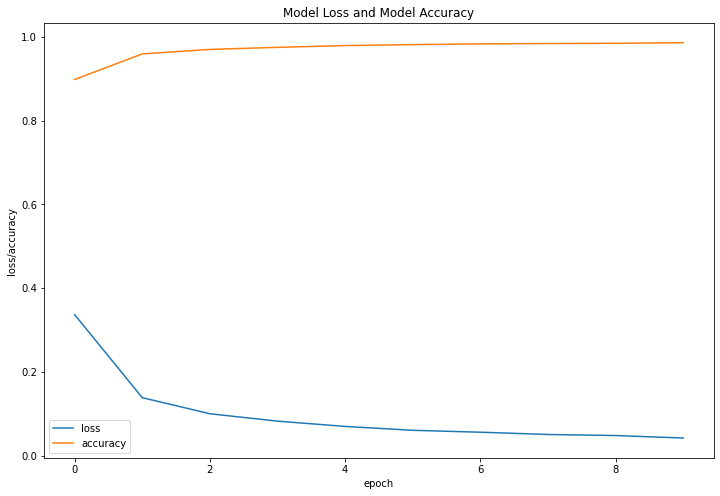

In [16]:
pyplot.figure(figsize=(12,8))
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('Model Loss and Model Accuracy')
pyplot.xlabel('epoch')
pyplot.ylabel('loss/accuracy')
pyplot.legend(['loss', 'accuracy'])

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [18]:
# evaluate the model
loss, acc = model.evaluate(x_test, yy_test, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.987


Based on the test data, the model is 98.7% accurate.  Let's randomly choose an image to test.  In the code below, the input ii can be changed from 0 to 9999 (10,000 test images).  

In [19]:
# make a prediction for the ith image
ii = 223
image = x_train[ii]
pred = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(pred))

Predicted: class=7


<strong><u>Plot Images and Compare Actual to Predicted:</u></strong>
Lets setup a routine to view a set of images along with the actual as well as the predicted values.  In the routine below, one can simply change the "istart" value to see the corresponding image and the next 11 subsequent images.  There are 10,000 test images, the routine below allows you to view a few subsets of that collection.
The image x-label color is used to indicate a correct (green) or incorrect (red) classification.

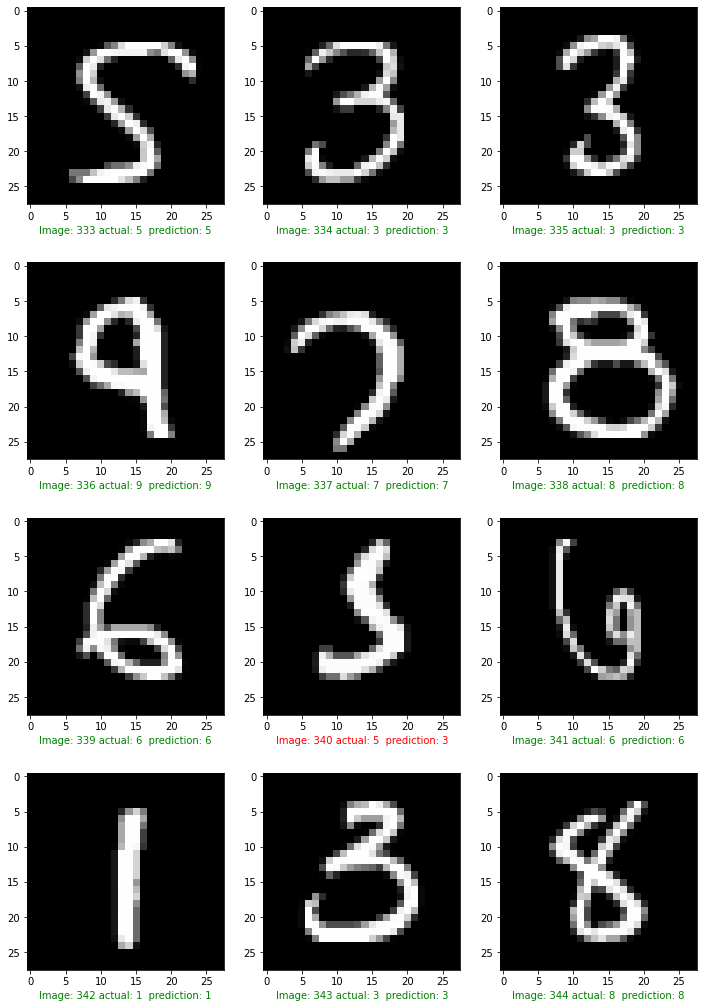

In [20]:
istart = 333
pyplot.figure(figsize=(12,18))
for i in range(12):
    # define subplot
    image = x_test[istart+i]
    pred = model.predict(asarray([image]))
    title="Image: " + str((istart+i)) + " actual: " + str(yy_test[istart+i]) + "  prediction: " + str(argmax(pred))
    if yy_test[istart+i] == argmax(pred):
        tcolor = "green"
    else:
        tcolor = "red"
    pyplot.subplot(4, 3, i+1)
    pyplot.xlabel(title, color = tcolor)
    # plot raw pixel data
    pyplot.imshow(xx_test[istart+i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()